<!-- DON'T EDIT THIS CELL! -->
<!-- TYPE SHIFT+ENTER AND GO TO THE NEXT CELL -->

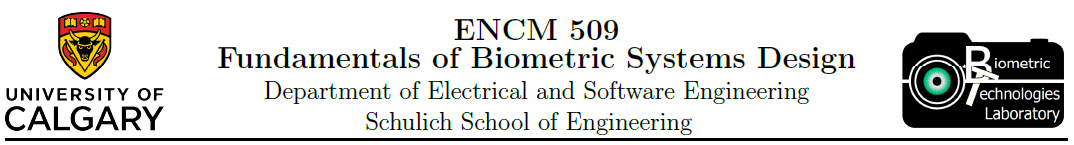

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d
import pandas as pd
from scipy.stats import norm

# to keep a good size for the plot figure, not the plot area!
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

## Statistics

In [9]:
# Theorectical Mean and Std
mu = 50
std = 5
qtt_samples = 80

pop_norm = norm.rvs(mu, std, size=qtt_samples)
pop_norm 

array([50.54045366, 52.84339382, 47.15251466, 53.79215322, 50.38593726,
       54.56782159, 50.10491308, 51.94712461, 50.06898995, 52.08348379,
       35.67318357, 54.58665995, 40.51897936, 48.36595735, 45.15957743,
       49.51947828, 50.37693671, 48.34594111, 55.32344293, 44.21991834,
       51.32123793, 48.64919309, 40.14662449, 44.99257925, 49.8538871 ,
       50.7688614 , 41.83816163, 49.07051089, 50.41930564, 43.00996973,
       47.89709855, 57.30600157, 48.18663744, 49.62499648, 56.3698419 ,
       54.2424412 , 48.56481404, 54.58405518, 53.75119329, 46.88952063,
       50.69436259, 47.80840706, 54.88847094, 52.87031037, 51.97748464,
       54.53529296, 47.47625839, 52.66547556, 54.01031139, 44.14620151,
       51.00673246, 58.09394332, 49.54929906, 41.73329191, 55.72139578,
       42.36690889, 49.16381676, 40.84949676, 54.47848416, 49.46620094,
       44.30824691, 48.95146134, 49.36534608, 53.80132032, 51.20337761,
       47.45271521, 49.61073124, 50.8505696 , 59.63021203, 51.74

REAL mean: 49.81; std: 4.54


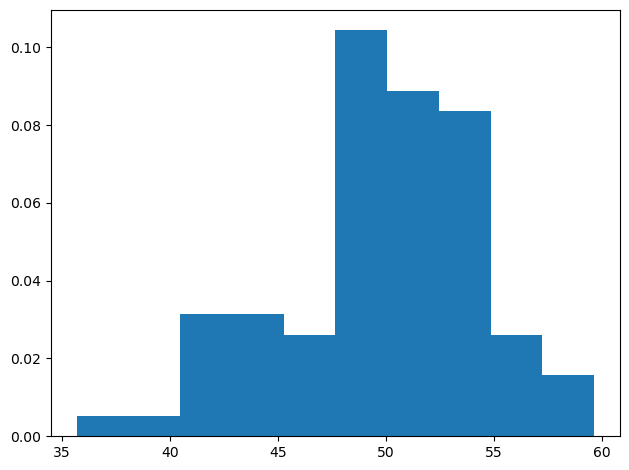

In [10]:
plt.hist(pop_norm, density=True);
print('REAL mean: %.2f; std: %.2f' % (np.mean(pop_norm), np.std(pop_norm)))

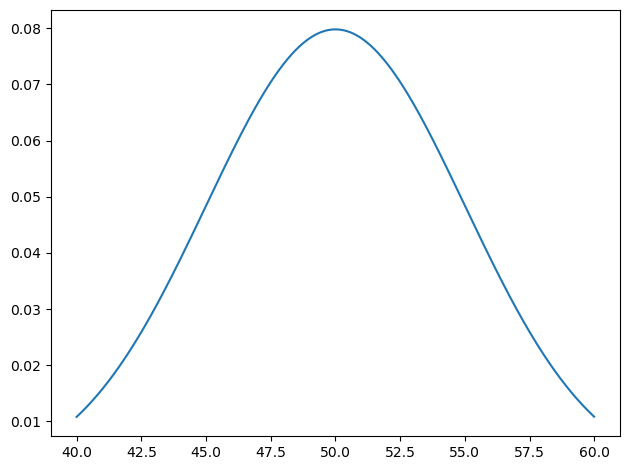

In [11]:
x = np.arange(40, 60, 0.01)

x_pdf = norm.pdf(x, loc=mu, scale=std)
plt.plot(x, x_pdf);

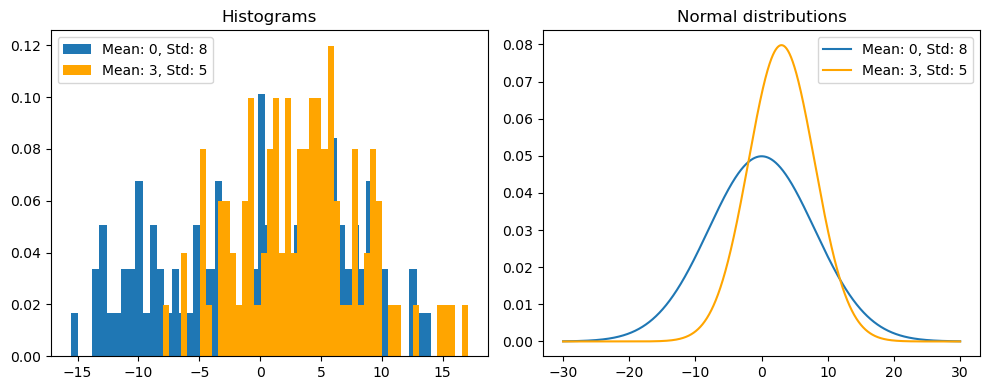

In [12]:
mu1, std1 = 0, 8 # blue
mu2, std2 = 3, 5 # orange

# population with higher variance
pop_norm1 = norm.rvs(mu1, std1, size=100)
pop_norm2 = norm.rvs(mu2, std2, size=100)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(pop_norm1, bins=50, density=True);
plt.hist(pop_norm2, bins=50, density=True, color='orange')
plt.title('Histograms')
plt.legend(['Mean: 0, Std: 8', 'Mean: 3, Std: 5'])

plt.subplot(1,2,2)
x1 = np.arange(-30, 30, 0.01)
plt.plot(x1, norm.pdf(x1, loc=mu1, scale=std1))
plt.plot(x1, norm.pdf(x1, loc=mu2, scale=std2), color='orange')
plt.legend(['Mean: 0, Std: 8', 'Mean: 3, Std: 5'])
plt.title('Normal distributions');

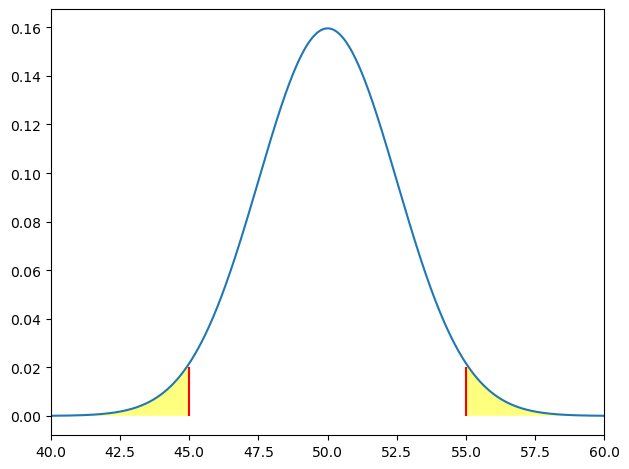

In [13]:
x = np.arange(0, 100, 0.01)

mu = 50
std = 2.5

x_pdf = norm.pdf(x, loc=mu, scale=std)

fig, ax = plt.subplots()
ax.plot(x, x_pdf)
# highlighting the critical regions
ax.fill_between(x, x_pdf, where=x<45, facecolor='yellow', alpha=0.5)
ax.fill_between(x, x_pdf, where=x>55, facecolor='yellow', alpha=0.5)

# lines corresponding to defined critical regions
ax.vlines([45, 55], 0, 0.02, 'r')
plt.xlim([40, 60]);

## Loading data
The data folder should be in the same directory as this Notebook

In [14]:
# data folder:
# 'signature_samples/biometrics/'
# 'signature_samples/calgary/'
# 'signature_samples/hello/'

# 'genuine' or 'impostor'
subdir = 'impostor/'
data_dir = 'SampleData/biometrics/' + subdir

csv_file = pd.read_csv(data_dir + '2.csv')

coord1 = csv_file[['X', 'Y']].to_numpy()
time1 = csv_file['Time'].to_numpy().reshape((-1,1))
prs1 = csv_file['Pressure'].to_numpy().reshape((-1,1))

csv_file.head()

,X,Y,Pressure,Time
0,103.709330,48.706852,0.410932,0
1,102.755336,46.677363,0.246559,2
2,103.709330,47.692108,0.250465,2
3,101.714615,45.740676,0.189795,16
4,102.755336,46.677363,0.226997,16


## Plotting based on Pressure

In [15]:
# to correctly map the pressure into the colormap the normalization is required 
prs1 = prs1 / np.max(prs1) * 255
prs1 = prs1.astype(int)

pressuremap = cm.get_cmap('jet', np.max(prs1)+1)

/var/folders/vl/ch29fks90xn1m477v18qgtvm0000gn/T/ipykernel_4772/1866396150.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  pressuremap = cm.get_cmap('jet', np.max(prs1)+1)


/var/folders/vl/ch29fks90xn1m477v18qgtvm0000gn/T/ipykernel_4772/910872588.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm);


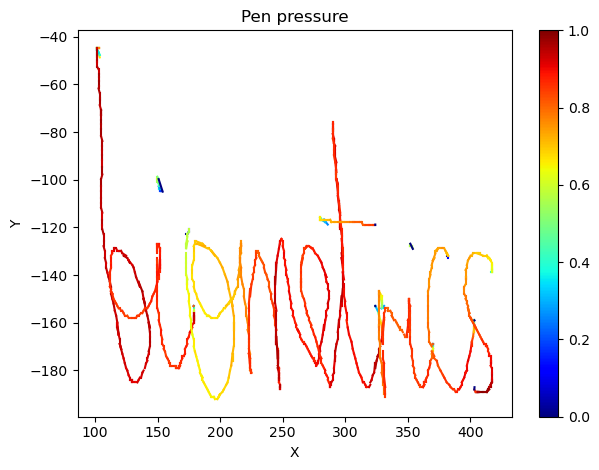

In [16]:
for i in range(len(prs1)-1):
    c = pressuremap(prs1[i]).squeeze()
    
    time_diff = abs(time1[i+1] - time1[i])
    if time_diff == 0:
        time_diff = 0.0001
        
    if time_diff < 17: # You may need to change this threshould
        im = plt.plot(coord1[i:i+2,0], -coord1[i:i+2,1], c=c)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Pen pressure')

sm = cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=0, vmax=1))
plt.colorbar(sm);

## Plotting presure over time

In [17]:
# removing outliers (after normalization): < 250 and > 150
prs = []
for x in prs1:
    if (x > 150 and x < 250):
        prs.append(x)

In [18]:
np.max(prs), np.min(prs), np.mean(prs)

(249, 151, 214.32134292565948)

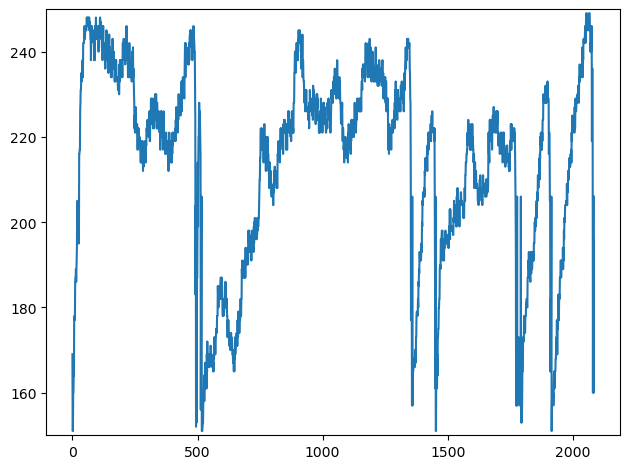

In [19]:
plt.plot(prs)
plt.ylim([150, 250]);

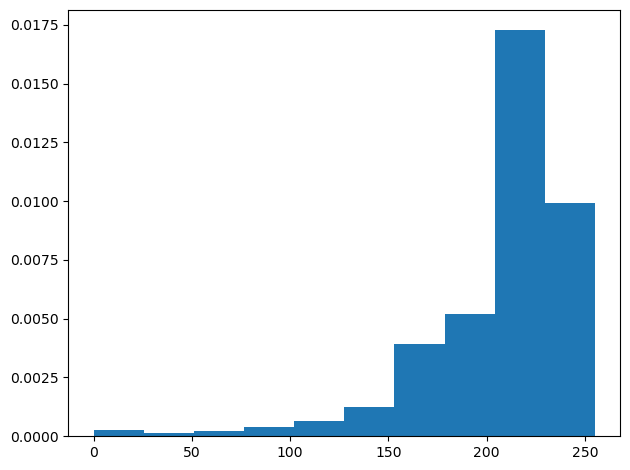

In [20]:
plt.hist(prs1, density=True);

206.99429323968394 38.22935110793147


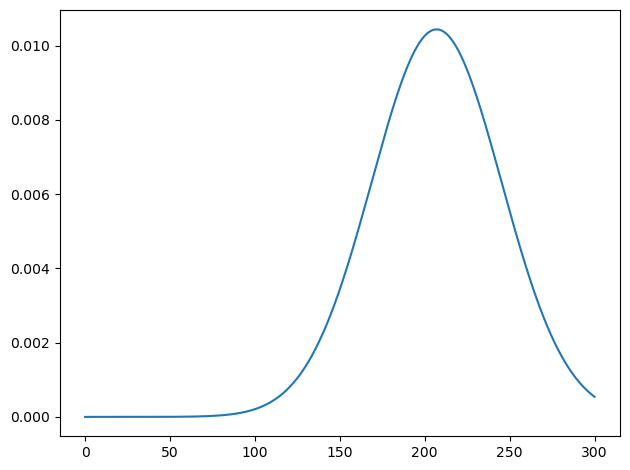

In [21]:
mu_prs = np.mean(prs1)
std_prs = np.std(prs1)
print(mu_prs, std_prs)

x = np.arange(0, 300, 0.01)

x_pdf = norm.pdf(x, loc=mu_prs, scale=std_prs)

plt.plot(x, x_pdf);

## Plotting and calculating the Velocity

/var/folders/vl/ch29fks90xn1m477v18qgtvm0000gn/T/ipykernel_4772/3937251973.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  velmap = cm.get_cmap('jet', np.max(vel)+1)
/var/folders/vl/ch29fks90xn1m477v18qgtvm0000gn/T/ipykernel_4772/3937251973.py:29: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm);


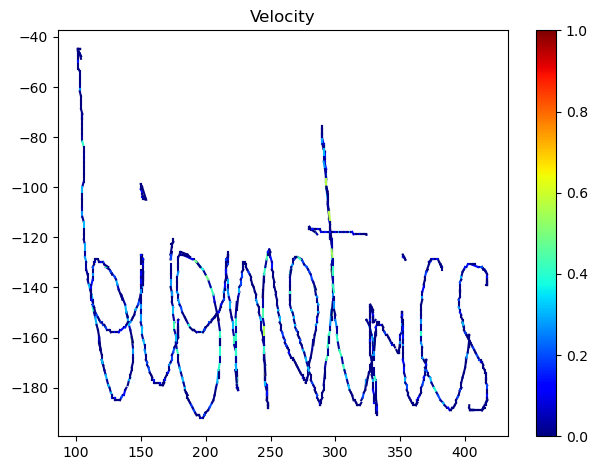

In [22]:
vel = np.zeros((len(time1)-1, 1))

for i in range(len(time1)-1):
    distance = np.sqrt((coord1[i+1,0] - coord1[i,0])**2 + 
                       (coord1[i+1,1] - coord1[i,1])**2)

    # if too fast, time_diff = 0
    time_diff = abs(time1[i+1] - time1[i])
    if time_diff != 0:
        vel[i] = distance / time_diff
    vel[i] = int(vel[i] * 1000) + 1

vel = np.insert(vel, 0, 1)
vel = vel / np.max(vel) * 255
vel = vel.astype(int)

velmap = cm.get_cmap('jet', np.max(vel)+1)

for i in range(len(vel)-1):
    c = velmap(vel[i])
    
    time_diff = abs(time1[i+1] - time1[i])
        
    if time_diff < 17: # You may need to change this threshould
        plt.plot(coord1[i:i+2,0], -coord1[i:i+2,1], c=c)
plt.title('Velocity')

sm = cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=0, vmax=1))
plt.colorbar(sm);

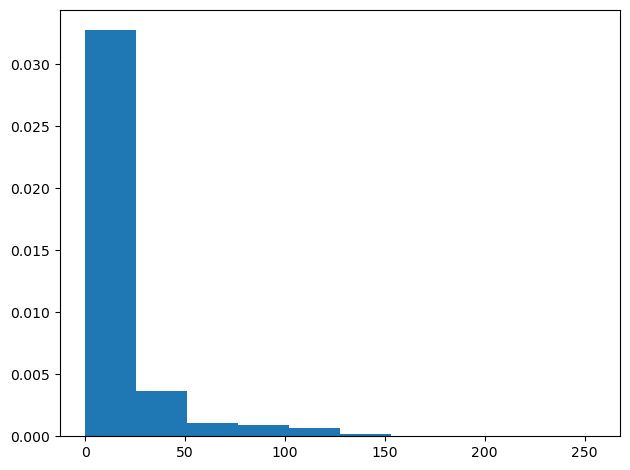

In [23]:
plt.hist(vel, density=True);

## Plotting Pressure in 3D

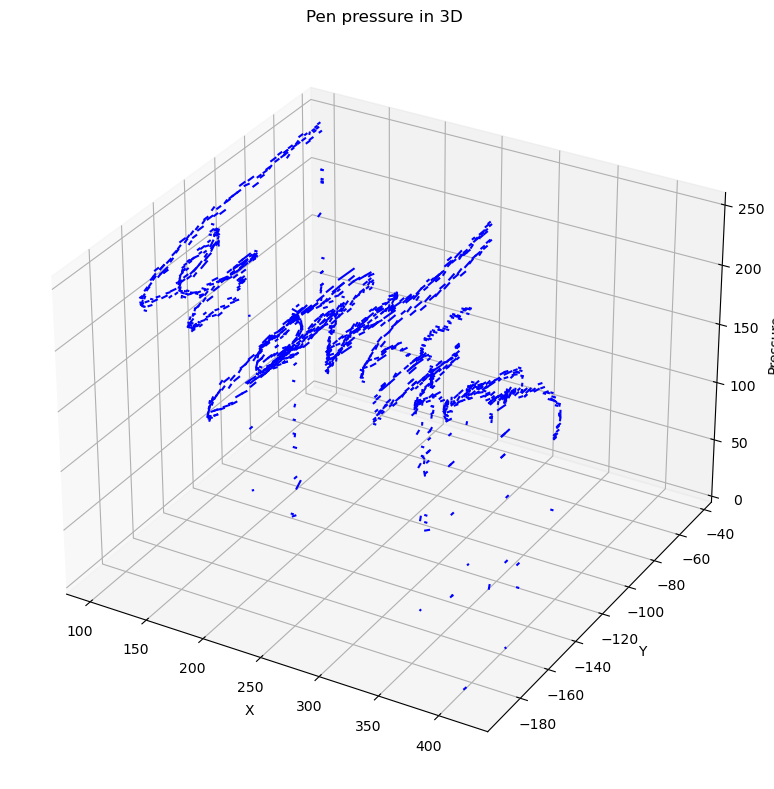

In [24]:
plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

for i in range(len(coord1)-1):
    time_diff = abs(time1[i+1] - time1[i])
        
    if time_diff < 18: # You may need to change this threshould
        ax.plot3D(coord1[i:i+2,0], -coord1[i:i+2,1], prs1[i], color='blue')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Pressure')
ax.set_title('Pen pressure in 3D');

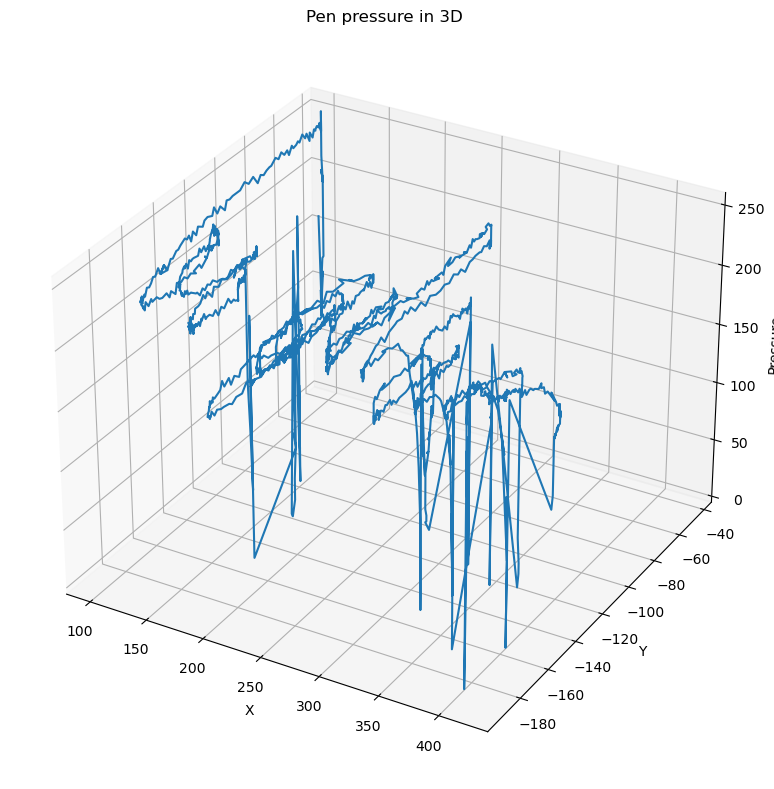

In [25]:
plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

ax.plot3D(coord1[:,0].flatten(), -coord1[:,1].flatten(), prs1.flatten())
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Pressure')
ax.set_title('Pen pressure in 3D');

## Statistical Evaluation

In [26]:
def calc_velocity(time, coords):
    vel = np.zeros((len(time)-1, 1))

    for i in range(len(time)-1):
        distance = np.sqrt((coords[i+1,0] - coords[i,0])**2 +
                           (coords[i+1,1] - coords[i,1])**2)
        
        # if too fast time_diff = 0
        time_diff = time[i+1] - time[i]
        if time_diff == 0:
            time_diff = 0.0001

        vel[i] = distance / time_diff
        vel[i] = int(vel[i] * 1000) + 1

    vel = np.insert(vel, 0, 1)
    vel = vel / np.max(vel) * 255
    vel = vel.astype(int)
    
    return vel

In [27]:
# columns: mean_vel, std_vec, mean_prs, std_prs
stats_measures = np.zeros((30,4))

# using 10-30 signatures
for i in range(30):
    csv_file = pd.read_csv(data_dir + '%d.csv' % (i+1))
    
    coord1 = csv_file[['X', 'Y']].to_numpy()
    time1 = csv_file['Time'].to_numpy().reshape((-1,1))
    prs1 = csv_file['Pressure'].to_numpy().reshape((-1,1))

    vel = calc_velocity(time1, coord1)
    
    stats_measures[i, 0] = np.mean(vel)
    stats_measures[i, 1] = np.std(vel)
    
    stats_measures[i, 2] = np.mean(prs1)
    stats_measures[i, 3] = np.std(prs1)
    
    print('#%d - pressure: %.2f; velocity: %.2f' %\
          (i, np.mean(prs1), np.mean(vel)))

#0 - pressure: 0.63; velocity: 11.20
#1 - pressure: 0.50; velocity: 9.83
#2 - pressure: 0.50; velocity: 12.17
#3 - pressure: 0.53; velocity: 15.97
#4 - pressure: 0.47; velocity: 16.27
#5 - pressure: 0.52; velocity: 18.06
#6 - pressure: 0.49; velocity: 11.96
#7 - pressure: 0.53; velocity: 13.95
#8 - pressure: 0.52; velocity: 10.02
#9 - pressure: 0.50; velocity: 12.55
#10 - pressure: 0.49; velocity: 19.25
#11 - pressure: 0.54; velocity: 14.77
#12 - pressure: 0.54; velocity: 16.59
#13 - pressure: 0.52; velocity: 10.51
#14 - pressure: 0.55; velocity: 17.67
#15 - pressure: 0.56; velocity: 17.65
#16 - pressure: 0.54; velocity: 12.37
#17 - pressure: 0.58; velocity: 9.33
#18 - pressure: 0.61; velocity: 10.27
#19 - pressure: 0.68; velocity: 15.83
#20 - pressure: 0.52; velocity: 11.14
#21 - pressure: 0.58; velocity: 18.02
#22 - pressure: 0.58; velocity: 7.16
#23 - pressure: 0.64; velocity: 11.04
#24 - pressure: 0.59; velocity: 17.19
#25 - pressure: 0.60; velocity: 10.20
#26 - pressure: 0.58; vel

In [28]:
# getting only the 1st velocity 'mean' and 'std'
print(stats_measures[0,0], stats_measures[0,1])

n = norm(stats_measures[0,0], stats_measures[0,1])

11.195794053662073 28.915672643775643


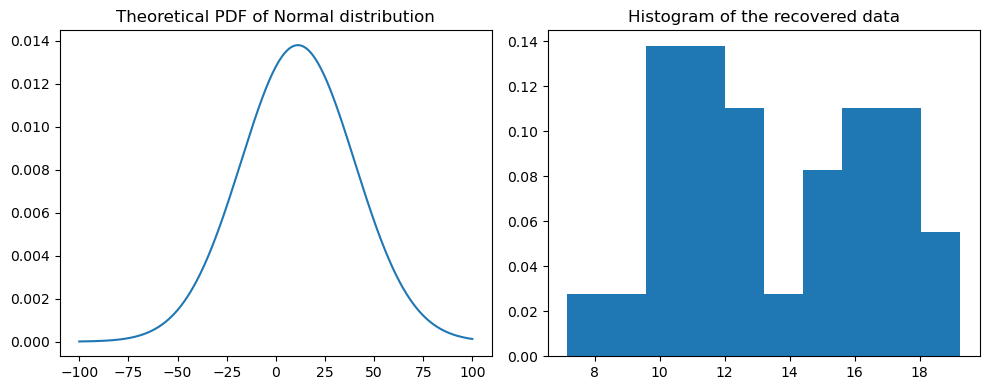

In [29]:
x = np.arange(-100, 100, 0.1)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(x, n.pdf(x))
plt.title('Theoretical PDF of Normal distribution');

plt.subplot(1,2,2)
plt.hist(stats_measures[:,0], density=True);
plt.title('Histogram of the recovered data');

# put the name of the set in the title

## Exercises

**General Marks**
1. Introduction (a paragraph about the purpose of the lab).
2. (10 marks) Description of the result on each exercise  with illustrations/graphs and analysis of the results (marks are distributed as shown in the Exercise section).
3. Conclusion (a paragraph on what is the main take-out of the lab).

**Specific Questions** (See the handout PDF for details)

- **Exercise 1** (2 marks): Consider a random sample of a normally distributed data with mean $\mu = 50$ and standard deviation $\sigma = 5$. The Scipy's function `norm.rvs(...)` is used to draw samples from a normal distribution.
    - Create another set of 1000 samples with $\mu = 50$ and $\sigma = 5$.
    - Plot the histogram with 100 bins.
    - Compare the results of the calculations of both sets. What conclusions can be drawn from the amount of samples compared with the mean and standard deviation calculated and the number of bins considered? 

- **Exercise 2** (1 marks): Consider a sample data of the word *Biometrics* written by a "genuine" person, and an "impostor" as a signature that replicates the shape but not the original pressure. Load the sample signature provided. Plot the signature in 2D with the color representing the pressure on each point. Similarly to calculation of the mean and std of the random data, calculate the mean and std of the pressure for one signature, and plot the Normal distribution.

- **Exercise 3** (1 mark): The code to calculate velocity and plot velocity map of one signature, provided in this lab, has the following `if` statement: `if time_diff == 0:`. 
    - Explain why it is necessary.
    - Plot in 3D, where the third coordinate represents pressure.

## Exersise 3 Explination

The reason that we check if the time difference is not 0 is for 2 reasons. first mathmatically speaking, the time velocity = distance/time. If time is 0, then the the velociy is undefined. This can be accounted by an alternative case where if time ==0, you replace the time with a sigfnicantly small number as showen in the lab handout.

This then leads to the second reason, if the time difference is recorded as 0, that means that the signature was recorded too fast and our sensors won't be able to pick it up. that it will not produce a reliable velocity. The velocity that would be used in such a case would not be useful in identification.

- **Exercise 4** (3 marks): Now  perform statistical analysis of pressure and velocity distribution  across average values of pressure or 30 signatures of the same person. We will represent the pressure of each signature by its average (mean) value, and then consider the distribution of these average values across genuine signatures. Consider 30 genuine signatures (yours or pre-recorded sample set, part a), and calculate average (mean) values and deviation from average (which will be calculated using standard deviation) for pressure. Plot a normal distribution of the average pressure values across the 30 signatures of the same individual. Perform the same for velocity. 

- **Exercise 5** (3 marks): Perform statistical analysis of average pressure and velocity distribution across 30 impostor signatures. As an "impostor", you can use either the 30 "forged" signatures (or part $b$ of the pre-recorded set), or 30 writings by yourself, of different shape/word (or part $c$ of the pre-recorded set). Represent the pressure (or velocity) of each signature by its average (mean), and then consider the distribution of these averages across 30 impostor signatures. How different are those distributions for "genuine" signatures from Exercise 4 and the "impostor" from Exercise 5?

In [30]:
def calc_velocity(time , coords ):
    vel = np.zeros((len(time)-1, 1))

    for i in range(len(time)-1):
        distance = np.sqrt((coords[i+1,0] - coords[i,0])**2 + ( coords[i+1,1] - coords[i,1])**2)

        # if too fast time diff = 0
        time_diff = time[i+1] - time[i]
        if time_diff == 0:
            time_diff = 0.0001

        vel[i] = distance / time_diff
        vel[i] = int(vel[i] * 1000) + 1

    vel = np.insert(vel, 0, 1)
    vel = vel/np.max(vel) * 255
    vel = vel.astype(int)
    return vel

In [31]:
imposter = "Data/Mushtaba-Labs/"

In [32]:
# columns: mean_vel, std_vec, mean_prs, std_prs
stats_measures = np.zeros((30,4))
overall_velocity_mean=0
overall_pressure_mean=0
# using 10-30 signatures
for i in range(30):
    print(imposter + '%d.csv' % (i+1))
    csv_file = pd.read_csv(imposter + '%d.csv' % (i+1))
    
    coord1 = csv_file[['X', 'Y']].to_numpy()
    time1 = csv_file['Time'].to_numpy().reshape((-1,1))
    prs1 = csv_file['Pressure'].to_numpy().reshape((-1,1))

    vel = calc_velocity(time1, coord1)
    
    stats_measures[i, 0] = np.mean(vel)
    stats_measures[i, 1] = np.std(vel)

    overall_velocity_mean+=stats_measures[i, 0]
    
    stats_measures[i, 2] = np.mean(prs1)
    stats_measures[i, 3] = np.std(prs1)

    overall_pressure_mean+=stats_measures[i, 3]
    
    print('#%d - pressure: %.2f; velocity: %.2f' %\
          (i, np.mean(prs1), np.mean(vel)))
print("overall velocity mean: ", overall_velocity_mean/30, "+\
      \noverall pressure mean: ",overall_pressure_mean/30)
  

Data/Mushtaba-Labs/1.csv
#0 - pressure: 0.58; velocity: 33.23
Data/Mushtaba-Labs/2.csv
#1 - pressure: 0.60; velocity: 31.05
Data/Mushtaba-Labs/3.csv
#2 - pressure: 0.64; velocity: 30.40
Data/Mushtaba-Labs/4.csv
#3 - pressure: 0.63; velocity: 36.68
Data/Mushtaba-Labs/5.csv
#4 - pressure: 0.65; velocity: 27.55
Data/Mushtaba-Labs/6.csv
#5 - pressure: 0.68; velocity: 30.16
Data/Mushtaba-Labs/7.csv
#6 - pressure: 0.70; velocity: 28.77
Data/Mushtaba-Labs/8.csv
#7 - pressure: 0.71; velocity: 31.74
Data/Mushtaba-Labs/9.csv
#8 - pressure: 0.68; velocity: 26.93
Data/Mushtaba-Labs/10.csv
#9 - pressure: 0.71; velocity: 27.57
Data/Mushtaba-Labs/11.csv
#10 - pressure: 0.68; velocity: 31.24
Data/Mushtaba-Labs/12.csv
#11 - pressure: 0.68; velocity: 30.83
Data/Mushtaba-Labs/13.csv
#12 - pressure: 0.70; velocity: 21.48
Data/Mushtaba-Labs/14.csv
#13 - pressure: 0.66; velocity: 18.53
Data/Mushtaba-Labs/15.csv
#14 - pressure: 0.66; velocity: 31.34
Data/Mushtaba-Labs/16.csv
#15 - pressure: 0.66; velocity: 2

Text(0.5, 0, 'Velocity')

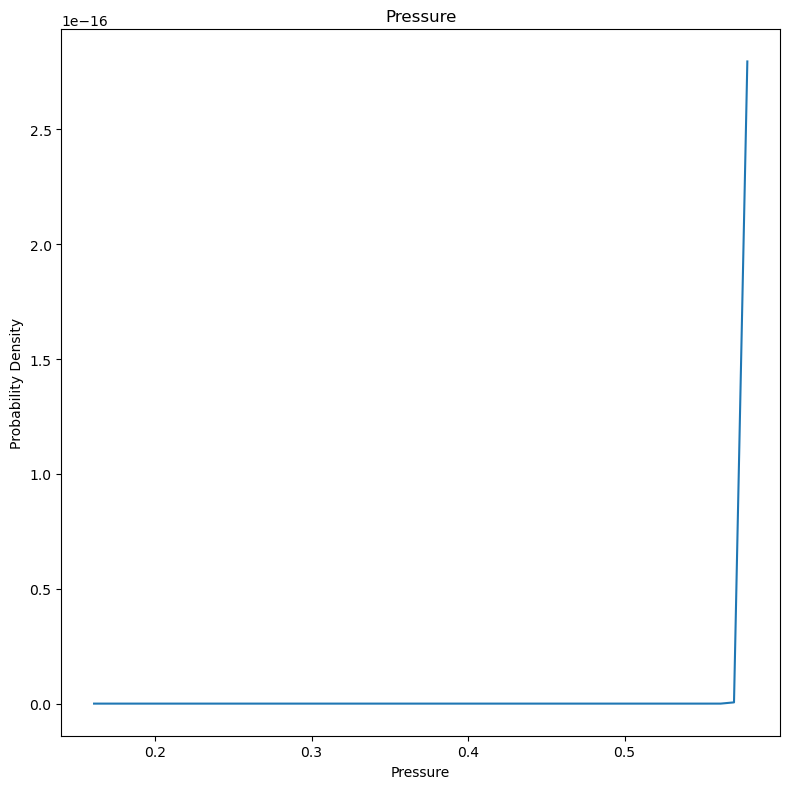

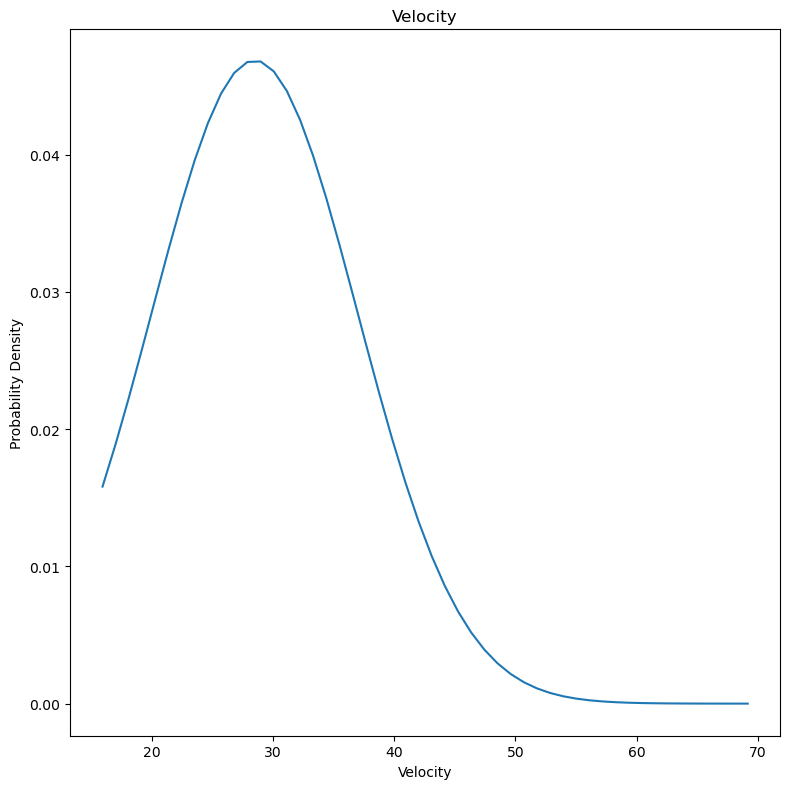

In [33]:
pressure_mean = stats_measures[:,2]
pressure_std = stats_measures[:,3]
velocity_mean = stats_measures[:,0]
velocity_std = stats_measures[:,1]

# x values to be used in the graphs
x_velocity = np.linspace(min(velocity_mean), max(velocity_std))
x_pressure = np.linspace(min(pressure_mean), max(pressure_std))

# normalizing the results for easier analysis
normalized_pressure = norm(np.mean(pressure_mean), np.std(pressure_std))
normalized_velocity = norm(np.mean(velocity_mean), np.std(velocity_std))

#plotting results
plt.figure(figsize=(8,8))
plt.plot(x_pressure, normalized_pressure.pdf(x_pressure))
plt.title('Pressure')
plt.ylabel('Probability Density')
plt.xlabel('Pressure')
plt.figure(figsize=(8,8))
plt.plot(x_velocity, normalized_velocity.pdf(x_velocity))
plt.title('Velocity')
plt.ylabel('Probability Density')
plt.xlabel('Velocity')